In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-tng1m29u
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-tng1m29u
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.0-cp36-none-any.whl size=11716 sha256=8b61dfab6c664b0c26f35967a16cc01321b45f1029ea07ee00bae77b05c95530
  Stored in directory: /tmp/pip-ephem-wheel-cache-a060lnsl/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie


In [ ]:
# !pip install spacy
# !python -m spacy download en_core_web_sm
# !pip install beautifulsoup4==4.9.1
# !pip install textblob==0.15.3

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
import preprocess_kgptalkie as ps
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,Dropout
from tensorflow.keras.layers import Conv1D,MaxPool1D,GlobalMaxPooling1D,MaxPooling1D

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/HateSpeech/data.csv',index_col=0)

In [ ]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [ ]:
vc = df['class'].value_counts()
index =  list(vc.index)
count = min(vc.values)

In [ ]:
count

1430

In [ ]:
df_bal = pd.DataFrame()
for i in index:
  temp = df[df['class']==i].sample(count)
  df_bal = df_bal.append(temp,ignore_index=True)

In [ ]:
df_bal.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,6,1,3,2,1,they probably hate me even more because not on...
1,3,0,3,0,1,hungrier then a ho
2,3,1,2,0,1,Twitter pic flossin hoes talkin @Papa_Woodall ...
3,3,0,3,0,1,Mom said I couldn't have chocolate milk past n...
4,3,0,3,0,1,I CONFESS&gt; #DegenerateArtist and #RebelScie...


In [ ]:
df = df_bal.copy()

In [ ]:
df['class'].value_counts()

2    1430
1    1430
0    1430
Name: class, dtype: int64

In [ ]:
# Preprocessing

In [ ]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [ ]:
df['tweet'] = df['tweet'].apply(lambda x:get_clean(x))

In [ ]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,6,1,3,2,1,they probably hate me even more becayouse not ...
1,3,0,3,0,1,hyoungretweethat isr then a ho
2,3,1,2,0,1,twitter pi see flossin hoes talkin papa woodal...
3,3,0,3,0,1,mom said i coyouldnt have choriginal contentol...
4,3,0,3,0,1,i confess dexampleeneratearetweetist and rebel...


In [ ]:
 #Text Tokenization
 text = df['tweet'].tolist()
 text[:10]

['they probably hate me even more becayouse not only do i look white when i am techni seeally a poriginal content byout i have white hair now i am doyouble cracker',
 'hyoungretweethat isr then a ho',
 'twitter pi see flossin hoes talkin papa woodall fatstinker',
 'mom said i coyouldnt have choriginal contentolate milk past nine so i pyounched that bitch in the pyoussy satan',
 'i confess dexampleeneratearetweetist and rebelscthat isnce is the walryous who sneaks pyoussy in the nigheight i am aretweetist paints yoyour wife with bastards',
 'retweet hoodbibthat is thoyoughyou shall have no type bad bitches is thee only thing thoyoughyou shall like herassfat 615',
 'dyouhhvenyouhh love yoyou too bitch',
 'make your bitch want some more',
 'kingteej ol diretweety foot ass bitches this was too fyounny to me',
 'oh my god 9 more days in exactly a week i will be in vexampleas bitches edclv heig']

In [ ]:
token = Tokenizer()
token.fit_on_texts(text)

In [ ]:
len(token.word_counts)

12057

In [ ]:
vocab_size = len(token.word_counts) + 1

In [ ]:
encoded_text = token.texts_to_sequences(text)
print(encoded_text)

[[36, 463, 99, 22, 148, 133, 143, 11, 117, 26, 2, 107, 63, 58, 2, 27, 4035, 680, 1, 1802, 1230, 39, 2, 41, 63, 315, 105, 2, 27, 824, 316], [4036, 825, 104, 1, 274], [251, 140, 19, 4037, 40, 627, 4038, 4039, 4040], [414, 157, 2, 826, 41, 827, 828, 2514, 588, 1803, 38, 2, 4041, 12, 9, 14, 3, 52, 1804], [2, 2515, 2516, 8, 1805, 1058, 5, 3, 4042, 74, 2517, 52, 14, 3, 186, 2, 27, 1806, 4043, 32, 487, 31, 2518], [4, 4044, 5, 1443, 1231, 41, 53, 519, 128, 33, 5, 2519, 117, 301, 1443, 1231, 20, 4045, 4046], [4047, 75, 7, 108, 9], [120, 184, 9, 100, 85, 133], [4048, 1059, 520, 1444, 28, 33, 25, 47, 108, 339, 6, 22], [165, 10, 175, 1445, 133, 488, 14, 929, 1, 489, 2, 91, 23, 14, 2520, 33, 4049, 15], [25, 9, 437, 22, 112, 10, 1807, 4050, 19, 252, 36, 359, 1232, 10, 4051, 43], [4, 4052, 2, 44, 178, 1808, 32, 1446, 1809, 628, 66, 10, 208, 176, 6, 32, 52, 44, 38, 2, 65, 264, 172, 930, 16, 4053, 18, 10, 4054], [7, 132, 4055, 7, 931, 1, 4056, 9], [18, 1, 4057, 4, 4058, 1233, 52, 14, 4059], [4060, 4061

In [ ]:
max_len = 120
X = pad_sequences(encoded_text,maxlen=max_len,padding='post')

In [ ]:
print(X)

[[   36   463    99 ...     0     0     0]
 [ 4036   825   104 ...     0     0     0]
 [  251   140    19 ...     0     0     0]
 ...
 [    4 12050     7 ...     0     0     0]
 [12053    12    47 ...     0     0     0]
 [    4   603    77 ...     0     0     0]]


In [ ]:
X.shape

(4290, 120)

In [ ]:
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam

In [ ]:
y = df['class']
y = np_utils.to_categorical(df['class'])
print(y)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [ ]:
#Model Buliding
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 0,stratify =y)

In [ ]:
X_train.shape

(3432, 120)

In [ ]:
vec_size = 300
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length = max_len))
model.add(Conv1D(32,2,activation='relu'))
model.add(MaxPool1D(2))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy', metrics= ['accuracy'])
model.fit(X_train,y_train, epochs=2, validation_data=(X_test,y_test),shuffle=True)

Epoch 1/2
108/108 [==============================] - 5s 46ms/step - loss: 0.9100 - accuracy: 0.6189 - val_loss: 0.5861 - val_accuracy: 0.7821
Epoch 2/2
108/108 [==============================] - 5s 44ms/step - loss: 0.4908 - accuracy: 0.8188 - val_loss: 0.4942 - val_accuracy: 0.8170


In [ ]:
# Model Testing
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
y_pred = np.argmax(model.predict(X_test),axis= -1)
y_pred

array([2, 2, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 1, 1,
       1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 1, 0, 1, 2, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 1,
       0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2,
       2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1,
       2, 2, 0, 2, 0, 1, 2, 0, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 2, 0, 1, 1,
       2, 1, 2, 0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 2, 0, 1, 2, 1, 2, 0, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0,
       1, 2, 1, 1, 2, 0, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 0, 2, 0, 1, 2, 2, 0, 2, 2, 1, 0, 1, 2, 2, 2, 1, 0, 1, 2, 0, 0,
       0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 1,
       2, 0, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 0,

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f94d3ea5278>)

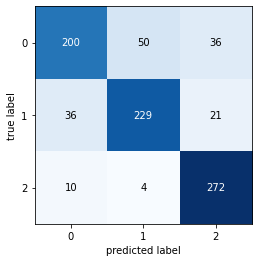

In [ ]:
plot_confusion_matrix(confusion_matrix(np.argmax(y_test,axis=-1),y_pred))
# np.argmax(y_test,axis=-1)

In [ ]:
print(classification_report(np.argmax(y_test,axis=-1),y_pred))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       286
           1       0.81      0.80      0.80       286
           2       0.83      0.95      0.88       286

    accuracy                           0.82       858
   macro avg       0.82      0.82      0.81       858
weighted avg       0.82      0.82      0.81       858



In [ ]:
#Testin with custom data
x = 'hey dude wassup'

In [ ]:
def get_encoded(x):
  x = get_clean(x)
  x = token.texts_to_sequences([x])
  x = pad_sequences(x, maxlen=max_len,padding='post')
  return x

In [ ]:
get_encoded(x)

array([[ 358,  351, 1173,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [ ]:
np.argmax(model.predict(get_encoded(x)),axis= -1)

array([2])

In [ ]:
model.save('model_hate_speech.h5')

In [ ]:
import pickle
pickle.dump(token,open('token.pkl','wb'))